# Fourier analysis (MSAP4-01A)

In [1]:
import star_privateer as sp
import plato_msap4_demonstrator_datasets.plato_sim_dataset as plato_sim_dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
sp.__version__

'1.2.0'

## K2: Rotation period analysis

In [4]:
t, s, dt = sp.load_k2_example ()

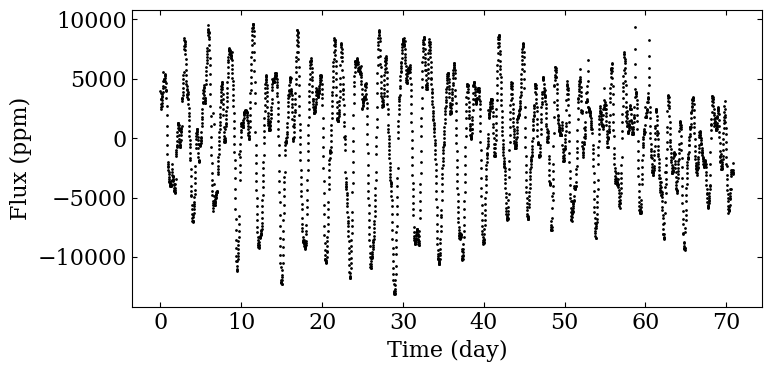

In [5]:
fig, ax = plt.subplots (1, 1, figsize=(8,4))

ax.scatter (t[s!=0]-t[0], s[s!=0], color='black', 
            marker='o', s=1)

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

fig.tight_layout ()

As we want to recover rotation periods below 45 days, we only consider the section of the periodogram verifying $P < P_\mathrm{cutoff} = 60$ days.

In [6]:
pcutoff = 60

As a preprocessing step, we compute the Lomb-Scargle periodogram (in the SAS framework, it will be directyly provided by MSAP1).

In [7]:
p_ps, ls = sp.compute_lomb_scargle (t, s)

Now we perform the periodogram analysis.

In [8]:
cond = p_ps < pcutoff
(prot, e_p, E_p, 
 _, param, h_ps) = sp.compute_prot_err_gaussian_fit_chi2_distribution (p_ps[cond], ls[cond], pfa_threshold=1e-6, 
                                                                       plot_procedure=False,
                                                                       verbose=False)
fig= sp.plot_ls (p_ps, ls, filename='figures/fourier_k2.png', param_profile=param, 
                 logscale=False, xlim=(0.1, 5))

In [9]:
IDP_SAS_PROT_FOURIER = sp.prepare_idp_fourier (param, h_ps, ls.size,
                                              pcutoff=pcutoff, pthresh=None,
                                              pfacutoff=1e-6)

df = pd.DataFrame (data=IDP_SAS_PROT_FOURIER)
df

0         1         2           3             4
0  2.800785  0.002798  0.002804  408.999297  1.000000e-16
1  1.400584  0.001399  0.001402  307.750010  1.000000e-16
2  0.781536  0.000781  0.000782  237.424642  1.000000e-16
3  1.371679  0.001370  0.001373  228.878140  1.000000e-16
4  2.688480  0.002685  0.002691  179.810535  1.000000e-16
5  1.429956  0.001428  0.001431   63.878992  1.000000e-16
6  0.127013  0.000009  0.000009   41.450787  1.000000e-16

In [10]:
df.to_latex (buf='data_products/idp_sas_prot_fourier_k2_211015853.tex', 
             formatters=['{:.2f}'.format, '{:.2f}'.format, '{:.2f}'.format,
                         '{:.2f}'.format, '{:.0e}'.format],  
             index=False, header=False)
np.savetxt ('data_products/IDP_SAS_PROT_FOURIER_K2.dat', 
             IDP_SAS_PROT_FOURIER)

## PLATO: Rotation period analysis

The PLATO simulation below encompasses both rotational modulation and low-frequency modulations due to activity. In order to analyse the rotational signal, we first filter out frequencies above 60 days (in PLATO, this will be done outside MSAP4).

In [11]:
filename = sp.get_target_filename (plato_sim_dataset, '040', filetype='csv')
t, s, dt = sp.load_resource (filename)
s_filtered = sp.preprocess (t, s, cut=60)

In [12]:
fig, ax = plt.subplots (1, 1, figsize=(8,4))

ax.scatter (t[s!=0]-t[0], s[s!=0], color='black', 
            marker='o', s=1, label="Unfiltered")
ax.scatter (t[s!=0]-t[0], s_filtered[s_filtered!=0], color='darkorange', 
            marker='o', s=1, label="Filtered")

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

ax.legend ()

fig.tight_layout ()

As we want to recover rotation periods below 60 days, we only consider the section of the periodogram verifying $P < P_\mathrm{cutoff} = 60$ days.

In [13]:
pcutoff = 60

As a preprocessing step, we compute the Lomb-Scargle periodogram (in the SAS framework, it will be directyly provided by MSAP1).

In [14]:
p_ps, ls = sp.compute_lomb_scargle (t, s_filtered)

Now we perform the periodogram analysis.

0         1         2          3             4
0  25.433099  0.025403  0.025454  44.875420  1.000000e-16
1   6.076207  0.006068  0.006080  15.077311  2.831438e-07

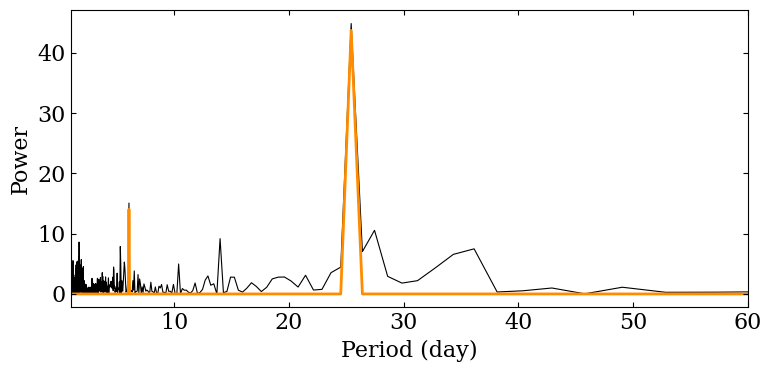

In [15]:
cond = p_ps < pcutoff
(prot, e_p, E_p, 
 _, param, h_ps) = sp.compute_prot_err_gaussian_fit_chi2_distribution (p_ps[cond], 
                                                                       ls[cond], 
                                                                       pfa_threshold=1e-6,
                                                                       verbose=False)
sp.plot_ls (p_ps, ls, filename='figures/fourier_plato_short.png', param_profile=param, 
            logscale=False, xlim=(1, pcutoff), 
            )
IDP_SAS_PROT_FOURIER = sp.prepare_idp_fourier (param, h_ps, ls.size,
                                              pcutoff=pcutoff, pthresh=None,
                                              pfacutoff=1e-6)
df = pd.DataFrame (data=IDP_SAS_PROT_FOURIER)
df

In [16]:
df.to_latex (buf='data_products/idp_sas_prot_fourier_plato_040.tex', 
             formatters=['{:.2f}'.format, '{:.2f}'.format, '{:.2f}'.format,
                         '{:.2f}'.format, '{:.0e}'.format],  
             index=False, header=False)
np.savetxt ('data_products/IDP_SAS_PROT_FOURIER_PLATO.dat', 
             IDP_SAS_PROT_FOURIER)

## PLATO: Long term modulation analysis

This time, we are interested in recovering long term modulations. We consider the section of the periodogram verifying $P > P_\mathrm{tresh} = 60$ days.

In [17]:
pthresh = 60

As a preprocessing step, we compute the Lomb-Scargle periodogram (in the SAS framework, it will be directyly provided by MSAP1).

In [18]:
p_ps, ls = sp.compute_lomb_scargle (t, s, normalisation="snr_flat")

Now we perform the periodogram analysis.

In [19]:
(plongterm, e_p, E_p, 
 _, param, h_ps) = sp.compute_prot_err_gaussian_fit_chi2_distribution (p_ps[p_ps>pthresh], 
                                                                       ls[p_ps>pthresh], 
                                                                       pfa_threshold=1e-6, 
                                                                       verbose=False)
fig = sp.plot_ls (p_ps, ls, filename='figures/fourier_plato_long.png', param_profile=param, 
                    logscale=False, xlim=(1,8*pthresh))
IDP_SAS_LONGTERM_MODULATION_FOURIER = sp.prepare_idp_fourier (param, h_ps, ls.size,
                                                              pcutoff=None, pthresh=pthresh,
                                                              pfacutoff=1e-6)
df = pd.DataFrame (data=IDP_SAS_LONGTERM_MODULATION_FOURIER)
df

0         1         2             3             4
0  343.497833  0.343238  0.343925  8.576472e+06  1.000000e-16
1  685.994492  0.684484  0.685852  2.198985e+06  1.000000e-16
2   85.690887  0.085443  0.085613  4.172111e+05  1.000000e-16
3  114.308839  0.114031  0.114259  4.035625e+05  1.000000e-16
4   62.343966  0.062187  0.062311  3.141029e+05  1.000000e-16
5  228.516929  0.227862  0.228317  1.820337e+05  1.000000e-16
6   97.934998  0.097654  0.097849  1.662900e+05  1.000000e-16
7  171.403827  0.170925  0.171267  1.490459e+05  1.000000e-16
8   76.173568  0.075956  0.076108  1.486087e+05  1.000000e-16
9  137.128087  0.136749  0.137022  8.018874e+04  1.000000e-16

In [20]:
df.to_latex (buf='data_products/idp_sas_longterm_modulation_fourier_plato_040.tex', 
             formatters=['{:.2f}'.format, '{:.2f}'.format, '{:.2f}'.format,
                         '{:.2f}'.format, '{:.0e}'.format],  
             index=False, header=False)
np.savetxt ('data_products/IDP_SAS_LONGTERM_MODULATION_FOURIER_PLATO.dat', 
             IDP_SAS_LONGTERM_MODULATION_FOURIER)